# Vanilla PCA

We can fit a PCA model in the GLRM framework. We'll test on the well known MNIST conveniently provided in the `tensorflow.examples.tutorials` module.

The variable notation is chosen to match the original GLRM paper.

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


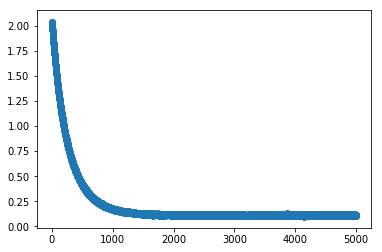

In [50]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)


N = 784      # features
M = 100      # batch size
K = 2        # latent dimension
steps = 5000 # gradient descent steps


g = tf.Graph()
with g.as_default():

    # observed representation
    A = tf.placeholder(shape=(M, N), dtype=tf.float32)
    
    # archetypical representations
    # NOTE: initialization is actually important here!
    X = tf.get_variable("X", shape=(M, K), initializer=tf.random_normal_initializer)
    Y = tf.get_variable("Y", shape=(K, N), initializer=tf.random_normal_initializer)
    
    # data reconstruction
    Z = tf.matmul(X, Y)
    
    # objective
    loss = tf.reduce_mean((A - Z)**2)
    train_op = tf.train.GradientDescentOptimizer(0.1).minimize(loss)
    

with tf.Session(graph=g) as sess:
    # setup
    sess.run(tf.global_variables_initializer())
    losses = np.zeros(steps)
    
    # estimation
    for step in range(steps):
        batch_xs, batch_ys = mnist.train.next_batch(M)
        _, losses[step] = sess.run([train_op, loss], feed_dict={A: batch_xs})

        
# summarize training
plt.figure()
plt.scatter(x=range(steps), y=losses)
plt.show()